##  Title : "Binge-Watch Breakdown: Analyzing Netflix Content Trends"

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [41]:
data=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\netflix_titles.csv")

In [42]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [44]:
data['listed_in'].head()

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

In [45]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [46]:
data.duplicated().sum()

0

In [47]:
data.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [49]:
df=data.drop(columns=['director','cast','country'])

In [50]:
df.isnull().sum()

show_id          0
type             0
title            0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [51]:
df['date_added']=df['date_added'].astype(str).str.strip()
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

In [52]:
median_date=df['date_added'].median()
df['date_added'].fillna(median_date,inplace=True)

In [53]:
most_common=df['rating'].mode()[0]
df['rating'].fillna(most_common,inplace=True)

In [54]:
df['rating'].isnull().sum()

0

In [55]:
most_common_duration=df['duration'].mode()[0]
df['duration'].fillna(most_common_duration, inplace=True)

In [56]:
df.isnull().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [57]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [58]:
df.head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [59]:
def category_rating(rating):
    kids = ['G', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-Y7-FV']
    teens = ['PG', 'TV-PG']
    adults = ['PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
    if rating in kids:
        return 'kids'
    elif rating in teens:
        return 'teens'
    elif rating in adults:
        return 'adults'
    else:
        return 'unknown'
df['rating_category']=df['rating'].apply(category_rating)
df[['rating','rating_category']].head(10)

,rating,rating_category
0,PG-13,adults
1,TV-MA,adults
2,TV-MA,adults
3,TV-MA,adults
4,TV-MA,adults
5,TV-MA,adults
6,PG,teens
7,TV-MA,adults
8,TV-14,adults
9,PG-13,adults


In [60]:
def category_rating(rating):
    kids = ['G', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-Y7-FV']
    teens = ['PG', 'TV-PG']
    adults = ['PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
    if rating in kids:
        return 'kids'
    elif rating in teens:
        return 'teens'
    elif rating in adults:
        return 'adults'
    else:
        return 'unknown'
df['rating_category']=df['rating'].apply(category_rating)
df[['rating','rating_category']].head(10)

,rating,rating_category
0,PG-13,adults
1,TV-MA,adults
2,TV-MA,adults
3,TV-MA,adults
4,TV-MA,adults
5,TV-MA,adults
6,PG,teens
7,TV-MA,adults
8,TV-14,adults
9,PG-13,adults


In [61]:
df['rating_category'].value_counts()

rating_category
adults     6663
teens      1150
kids        908
unknown      86
Name: count, dtype: int64

In [62]:
df['rating_category'] = df['rating_category'].astype(str)
df['rating_category'] = df['rating_category'].str.strip()
df = df[~df['rating_category'].str.lower().str.strip().eq('unknown')]
print(df['rating_category'].value_counts())

rating_category
adults    6663
teens     1150
kids       908
Name: count, dtype: int64


In [63]:
df.loc[:, 'listed_in'] = df['listed_in'].str.split(',').apply(lambda x: [i.strip() for i in x])
df = df.explode('listed_in').reset_index(drop=True)
df.head()

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description,rating_category
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",adults
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",adults
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",adults
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",adults
4,s3,TV Show,Ganglands,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,adults


In [64]:
df['listed_in']=df['listed_in'].astype('category')
df['listed_in'].dtypes

CategoricalDtype(categories=['Action & Adventure', 'Anime Features', 'Anime Series',
                  'British TV Shows', 'Children & Family Movies',
                  'Classic & Cult TV', 'Classic Movies', 'Comedies',
                  'Crime TV Shows', 'Cult Movies', 'Documentaries',
                  'Docuseries', 'Dramas', 'Faith & Spirituality',
                  'Horror Movies', 'Independent Movies',
                  'International Movies', 'International TV Shows', 'Kids' TV',
                  'Korean TV Shows', 'LGBTQ Movies', 'Movies',
                  'Music & Musicals', 'Reality TV', 'Romantic Movies',
                  'Romantic TV Shows', 'Sci-Fi & Fantasy',
                  'Science & Nature TV', 'Spanish-Language TV Shows',
                  'Sports Movies', 'Stand-Up Comedy',
                  'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure',
                  'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries',
                  'TV Sci-Fi & Fantasy', '

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19144 entries, 0 to 19143
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          19144 non-null  object        
 1   type             19144 non-null  object        
 2   title            19144 non-null  object        
 3   date_added       19144 non-null  datetime64[ns]
 4   release_year     19144 non-null  int64         
 5   rating           19144 non-null  object        
 6   duration         19144 non-null  object        
 7   listed_in        19144 non-null  category      
 8   description      19144 non-null  object        
 9   rating_category  19144 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(7)
memory usage: 1.3+ MB


In [66]:
df.nunique()

show_id            8721
type                  2
title              8721
date_added         1699
release_year         74
rating               12
duration            220
listed_in            42
description        8690
rating_category       3
dtype: int64

In [67]:
sns.set_style('whitegrid')

In [68]:
df['listed_in'].describe()

count                    19144
unique                      42
top       International Movies
freq                      2716
Name: listed_in, dtype: object

##  Which Rating Dominate ?

In [ ]:
## Insights :
## TV-MA is the most dominating rating

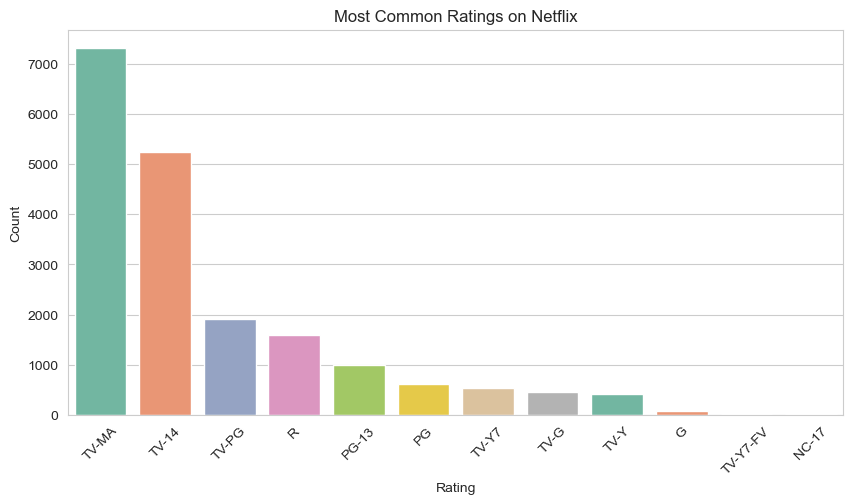

In [91]:
rating_counts = df['rating'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Set2')
plt.title('Most Common Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## How they differ by type (Movie vs TV Show) ?

In [ ]:
## Insight:
## Movies tend to be more R and PG-13.
## TV Shows lean more toward TV-MA and TV-14

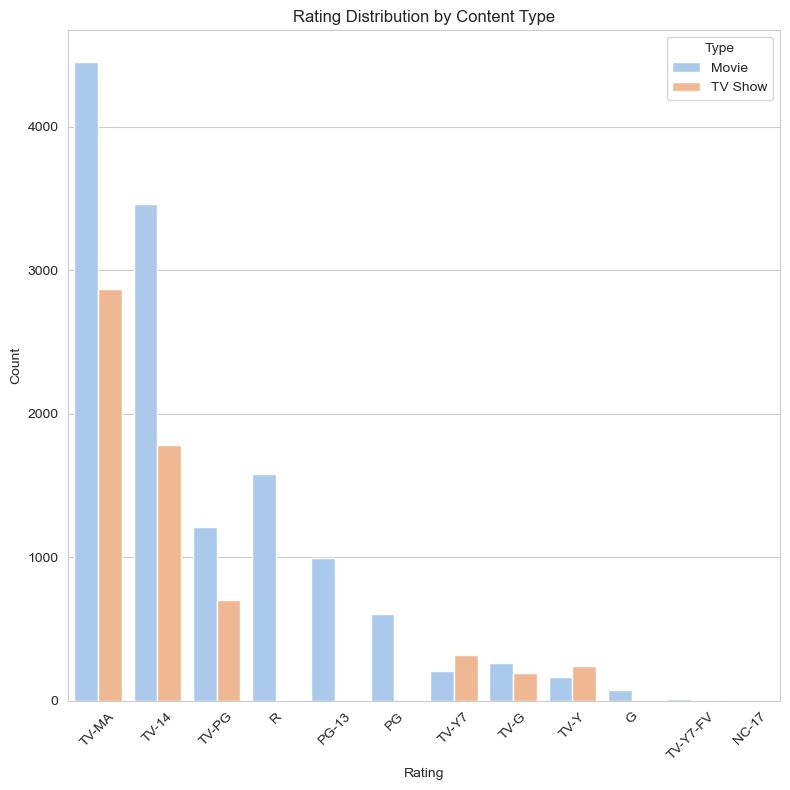

In [98]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index, palette='pastel')
plt.title('Rating Distribution by Content Type')
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


## Which genres dominate Netflix’s content library?

In [ ]:
## Insights:
## International Movies is the most dominating generes in Netflix

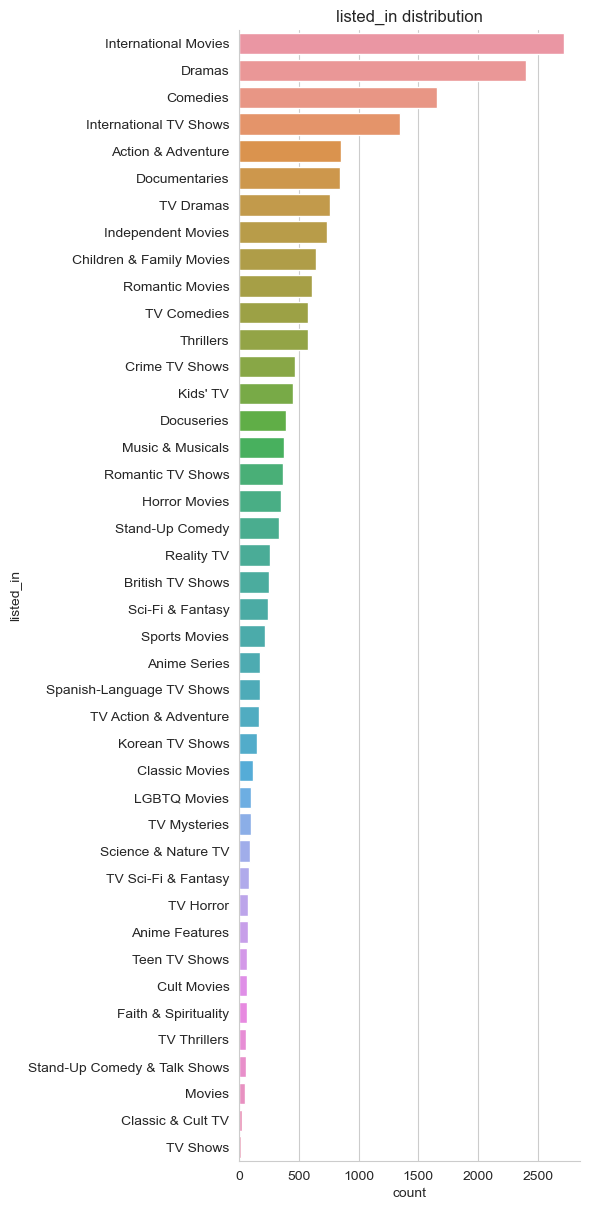

In [89]:
sns.catplot(y='listed_in',data=df,kind='count',
            order=df['listed_in'].value_counts().index,
           height=12,     
           aspect=0.5)
plt.title('listed_in distribution')
plt.show()

## What is the distribution of Netflix content across different audience rating categories  and which category dominates the platform?

In [ ]:
## Insights :
## Adults category is the most common views of netflix 

<Figure size 300x300 with 0 Axes>

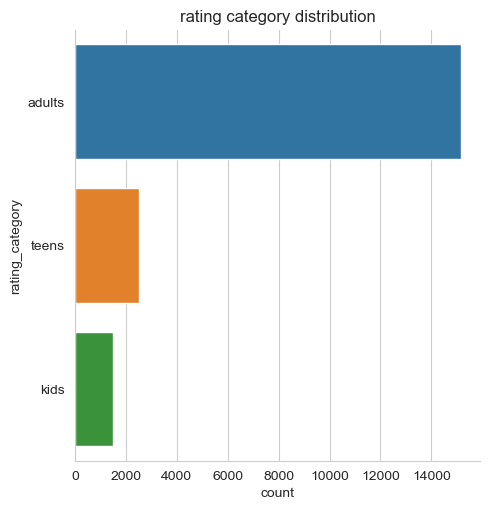

In [88]:
plt.figure(figsize=(3,3))
sns.catplot(y='rating_category',data=df,kind='count',
            order=df['rating_category'].value_counts().index,
            )
plt.title('rating category distribution')
plt.show()

## What is the distribution of movies versus TV shows on Netflix ?

In [ ]:
## Insights :
## Movie category is most popular category in netflix
## which is most commonly watched by views

<Figure size 100x100 with 0 Axes>

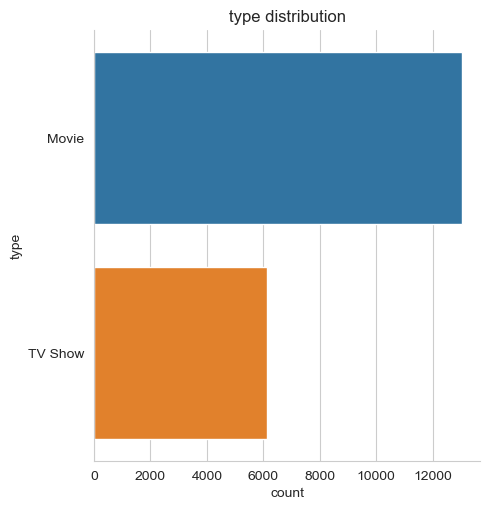

In [87]:
plt.figure(figsize=(1,1))
sns.catplot(y='type',data=df,kind='count',
            order=df['type'].value_counts().index,
            )
plt.title('type distribution')
plt.show()

## Which year had the highest number of movie releases on Netflix?

In [ ]:
## Insights :
## In 2020 mostl of the generes are released which shows the crazy
## of Netflix increase in this year

Text(0.5, 1.0, 'Release year distribution')

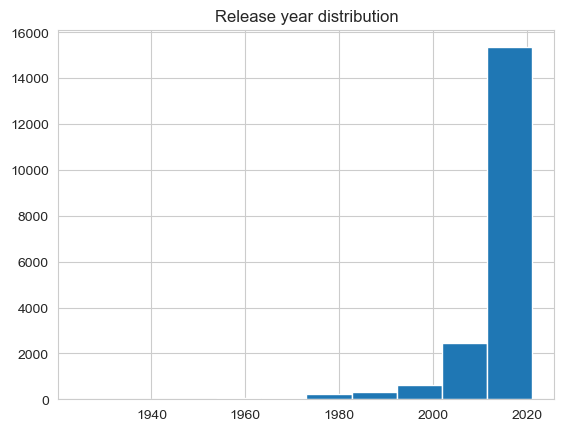

In [84]:
df['release_year'].hist()
plt.title('Release year distribution')

## Conclusions

In [ ]:
* TV-MA is the most dominating rating
* Movies tend to be more R and PG-13 TV Shows lean more toward TV-MA and TV-14
* International Movies is the most dominating generes in Netflix
* Adults category is the most common views of netflix 
* Movie category is most popular category in netflix which is most commonly watched by views
* In 2020 mostl of the generes are released which shows the crazy of Netflix increase in this year